In [20]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.dates as mdates
# csv file was taken 
df = pd.read_csv('Automatic_Hourly_Pedestrian_Count.csv')
#check the top
df.head(5)


,Location_code,Location_Name,Date,ShortDate,TotalCount,Hour,Day,DayNo,Week,LastWeek,Previous4DayTimeAvg,ObjectId,LastYear,Previous52DayTimeAvg
0,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,1,2090.0,1572.0
1,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,2,1947.0,1775.0
2,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,3,776.0,459.0
3,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,4,529.0,494.0
4,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,5,2678.0,2267.0


In [21]:
# get data shape or how it looks has 99635 and 14 columns
df.shape

(99635, 14)

In [22]:
# remove duplicates get shape is 13 columns wtih 99635 entires

df.drop_duplicates()
# get data shape looks the same as previous shape
df.shape

(99635, 14)

In [23]:
# make all columns lower case
df.columns = [col.lower() for col in df]

df.head()
# can see that all the columns are now lower case

,location_code,location_name,date,shortdate,totalcount,hour,day,dayno,week,lastweek,previous4daytimeavg,objectid,lastyear,previous52daytimeavg
0,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,1,2090.0,1572.0
1,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,2,1947.0,1775.0
2,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,3,776.0,459.0
3,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,4,529.0,494.0
4,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,5,2678.0,2267.0


In [24]:
# set index by object id
df.set_index('objectid',inplace=True)
df.head()


,location_code,location_name,date,shortdate,totalcount,hour,day,dayno,week,lastweek,previous4daytimeavg,lastyear,previous52daytimeavg
objectid,,,,,,,,,,,,,
1,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2959,18,Tuesday,2,2022.51,2882.0,2690.0,2090.0,1572.0
2,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,2462,18,Tuesday,2,2022.51,2425.0,2410.0,1947.0,1775.0
3,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,814,18,Tuesday,2,2022.51,778.0,744.0,776.0,459.0
4,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13 00:00:00+00,782,18,Tuesday,2,2022.51,911.0,828.0,529.0,494.0
5,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13 00:00:00+00,4182,17,Tuesday,2,2022.51,4260.0,3855.0,2678.0,2267.0


In [25]:
# change the formatting of shortdate, has unessary fluff
df.shortdate =  df.shortdate.apply(lambda x : x.rstrip(' 0:+'))
df.head()

,location_code,location_name,date,shortdate,totalcount,hour,day,dayno,week,lastweek,previous4daytimeavg,lastyear,previous52daytimeavg
objectid,,,,,,,,,,,,,
1,A004,Park Street,2022/12/13 18:00:00+00,2022/12/13,2959,18,Tuesday,2,2022.51,2882.0,2690.0,2090.0,1572.0
2,A003,Market Street,2022/12/13 18:00:00+00,2022/12/13,2462,18,Tuesday,2,2022.51,2425.0,2410.0,1947.0,1775.0
3,A002,Elizabeth Street,2022/12/13 18:00:00+00,2022/12/13,814,18,Tuesday,2,2022.51,778.0,744.0,776.0,459.0
4,A001,Bridge Street,2022/12/13 18:00:00+00,2022/12/13,782,18,Tuesday,2,2022.51,911.0,828.0,529.0,494.0
5,A004,Park Street,2022/12/13 17:00:00+00,2022/12/13,4182,17,Tuesday,2,2022.51,4260.0,3855.0,2678.0,2267.0


In [26]:

# group by date and sum the total count for each date from each location
grouped_items = df.groupby('shortdate')['totalcount'].sum().reset_index()
#convert index to date formate for easier useage and ordering
grouped_items.shortdate = pd.to_datetime(grouped_items.shortdate )

grouped_items.head(5)


,shortdate,totalcount
0,2020-02-14,126708
1,2020-02-15,60963
2,2020-02-16,48070
3,2020-02-17,99227
4,2020-02-18,125356


In [27]:
# as you see above it's not ordered by dates thus order by date
grouped_items.sort_values(by='shortdate', inplace=True)
grouped_items


,shortdate,totalcount
6,2020-02-02,142863
0,2020-02-14,126708
1,2020-02-15,60963
2,2020-02-16,48070
3,2020-02-17,99227
...,...,...
1034,2022-12-14,105883
1035,2022-12-15,111946
1036,2022-12-16,92219
1037,2022-12-17,55944


In [28]:
# we see thre is one out lying in the first one so we will remove it
grouped_items = grouped_items.iloc[1:]
# reset the index
grouped_items = grouped_items.reset_index(drop=True)
grouped_items

,shortdate,totalcount
0,2020-02-14,126708
1,2020-02-15,60963
2,2020-02-16,48070
3,2020-02-17,99227
4,2020-02-18,125356
...,...,...
1033,2022-12-14,105883
1034,2022-12-15,111946
1035,2022-12-16,92219
1036,2022-12-17,55944


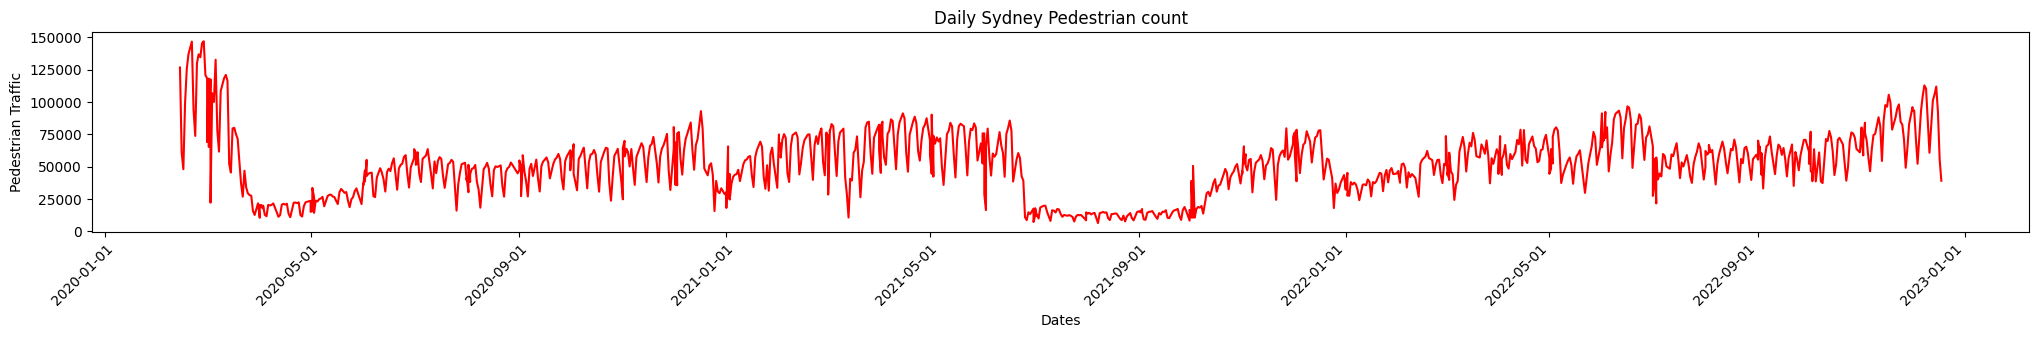

In [105]:
# now to plot the figure using matplotlib
# set the figure
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily Sydney Pedestrian count')
def plot_figure(x,y):
	# fit the dates
	plt.subplots_adjust(bottom = 0.5, top = 0.9)
	#rotate the x-axis values
	plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
	# set the lables for x and y
	ax.set_ylabel('Pedestrian Traffic')
	ax.set_xlabel('Dates')
	ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
	ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
	ax.plot(x,y, scaley=True, scalex=True, color="red")
	plt.show()

x,y = grouped_items.shortdate, grouped_items.totalcount
plot_figure(x,y)


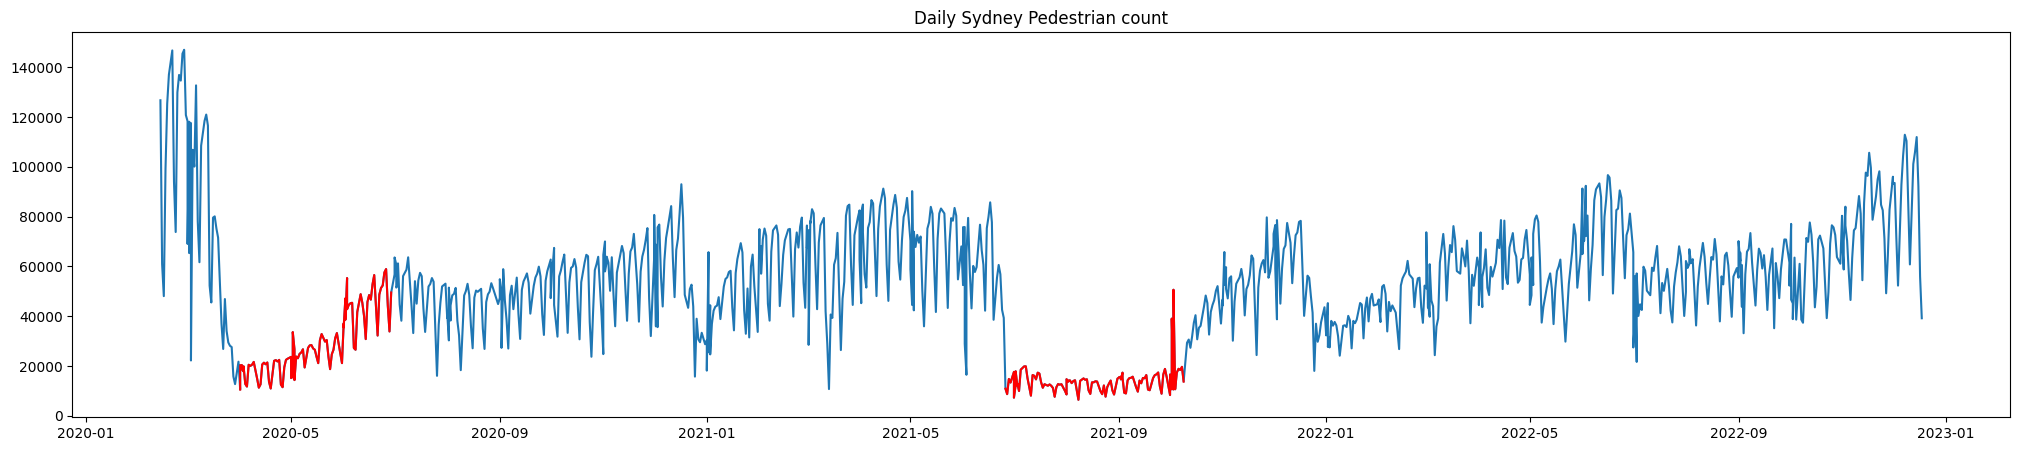

In [121]:
# From the Plot above you can see there are some events where the activity has reduced significantly by the lockdown dates
# lockdown dates where from 31-3--20 to 1-7-20 and 23-8-21 to 11-10-21
# get the dates
lockdown1_dates = grouped_items[((grouped_items.shortdate > '2020-3-31') & (grouped_items.shortdate < '2020-7-1')) ]
lockdown2_dates = grouped_items[(grouped_items.shortdate > '2021-6-25') & (grouped_items.shortdate < '2021-10-11')]
# assign on the graph
xa,ya = lockdown1_dates.shortdate,lockdown1_dates.totalcount
xb,yb = lockdown2_dates.shortdate,lockdown2_dates.totalcount
fig.clear()
# new figure
fig = plt.figure(figsize=(25,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Daily Sydney Pedestrian count with lockdowns')
ax.set_ylabel('Pedestrian Traffic')
ax.set_xlabel('Dates')
# plot inital
ax.plot(x,y)
# plot lockdown dates
ax.plot(xa,ya, color= 'red')
ax.plot(xb,yb, color= 'red')
plt.show()

In [ ]:
#From the graph above you can see a lot of data lets try shorten it down
#set index to short date
grouped_items = grouped_items.set_index('shortdate')
grouped_items

,totalcount
shortdate,
2020-02-14,126708
2020-02-15,60963
2020-02-16,48070
2020-02-17,99227
2020-02-18,125356
...,...
2022-12-14,105883
2022-12-15,111946
2022-12-16,92219


In [ ]:
# going to resample the data to weekly to reduce data size the string 'W-Mon' means week starting Monday
weekly_group_df = grouped_items.resample('W-Mon').sum()
weekly_group_df = weekly_group_df.reset_index()
weekly_group_df

,shortdate,totalcount
0,2020-02-17,334968
1,2020-02-24,706781
2,2020-03-02,1055459
3,2020-03-09,727696
4,2020-03-16,533289
...,...,...
144,2022-11-21,566063
145,2022-11-28,545136
146,2022-12-05,561603
147,2022-12-12,562594


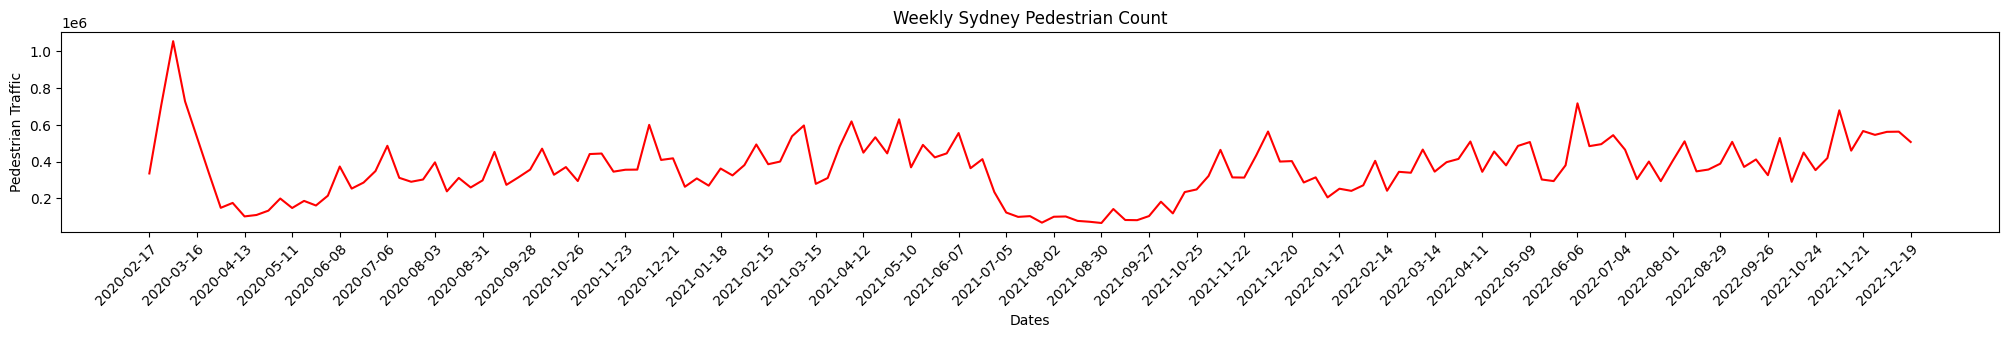

In [122]:
# As you can see we have reduced everything to weekly
fig.clear()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Weekly Sydney Pedestrian Count')
# set more fequent x axis ticks
ax.set_xticks(weekly_group_df.shortdate[::4])

plot_figure(weekly_group_df.shortdate,weekly_group_df.totalcount)

In [127]:
# now for lockdown dates to weeks
weekly_lockdown1_dates = weekly_group_df[((weekly_group_df.shortdate > '2020-3-31') & (weekly_group_df.shortdate < '2020-7-1')) ]
weekly_lockdown2_dates = weekly_group_df[(weekly_group_df.shortdate > '2021-6-25') & (weekly_group_df.shortdate < '2021-10-11')]
weekly_lockdown1_dates.head()


,shortdate,totalcount
7,2020-04-06,174519
8,2020-04-13,101097
9,2020-04-20,108742
10,2020-04-27,132340
11,2020-05-04,198501


AttributeError: 'AxesSubplot' object has no attribute 'setx'

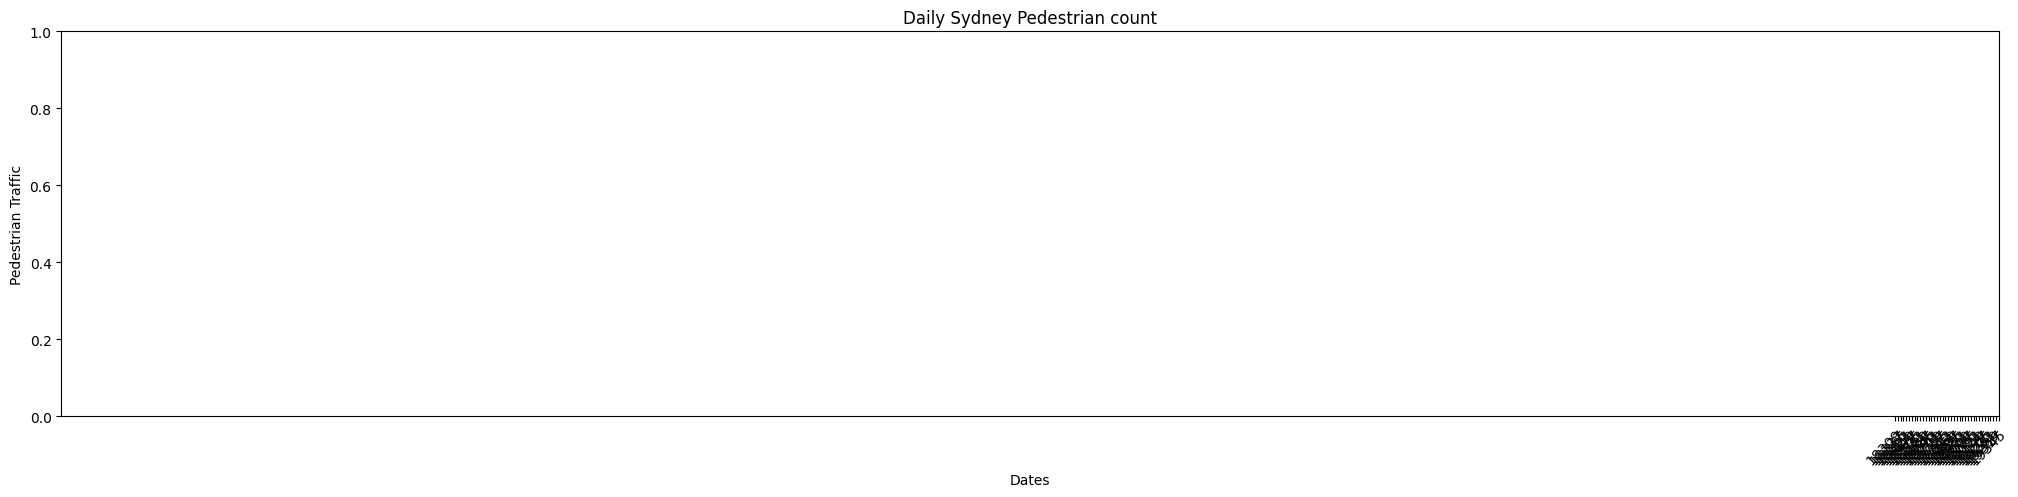

In [132]:
# assign on the graph
x,y = weekly_group_df.shortdate,weekly_group_df.totalcount
xa,ya = weekly_lockdown1_dates.shortdate,weekly_lockdown1_dates.totalcount
xb,yb = weekly_lockdown2_dates.shortdate,weekly_lockdown2_dates.totalcount
# new figure
fig = plt.figure(figsize=(25,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Daily Sydney Pedestrian count')
ax.set_ylabel('Pedestrian Traffic')
ax.set_xlabel('Dates')
# set more fequent x axis ticks
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
ax.set_xticks(weekly_group_df.shortdate[::4])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
# plot inital
ax.plot(x,y)
# plot lockdown dates
ax.plot(xa,ya, color= 'red')
ax.plot(xb,yb, color= 'red')
plt.show()

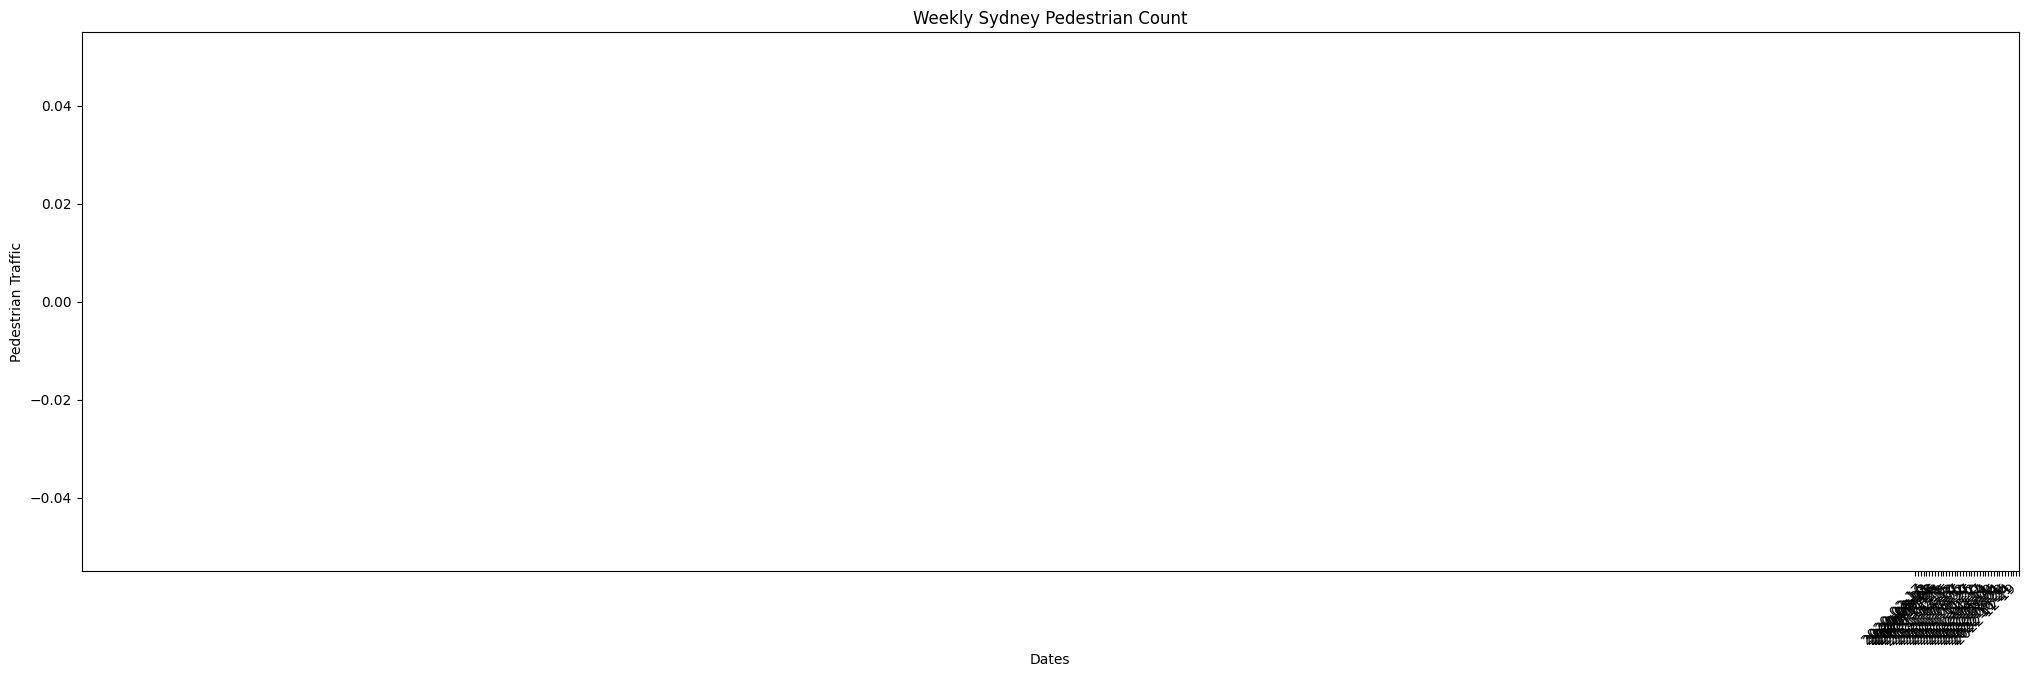

In [ ]:
# Now that looks better, we can see how much the lockdown has had effect on the pedestrian count 

# now lets animate it!

# inital clean up function
def init():
	del xs[:]
	del ys[:]
	line.set_data(xs, ys)
	return line,
# set figures 
fig = plt.figure(figsize=(25,7))
ax = fig.add_subplot(1,1,1)
 #rotate the x-axis values
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
# set the titles
ax.set_title('Weekly Sydney Pedestrian Count')
ax.set_ylabel('Pedestrian Traffic')
ax.set_xlabel('Dates')
# set the xtick frequencies
ax.set_xticks(weekly_group_df.shortdate[::4])
# formate the dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
# initate line
line, = ax.plot([], [], lw=2)
# empty lists for the animation
xs,ys = [],[]
# animation function that loops through frames i
def run(i):
	xs.append(weekly_group_df.shortdate.iloc[i])
	ys.append(weekly_group_df.totalcount.iloc[i])
	line.set_data(xs, ys)
	ax.relim()
	ax.autoscale()
	return line,
# magic happens
# animate = ani.FuncAnimation(fig, run, interval=100, frames = 148,init_func = init)
# save the animation in a gif using PillowWriter
# animate.save("Weekly-Sydney-Pedestrian-Count.gif", dpi=300, writer=PillowWriter(fps=25))
# should be saved as fig in the same folder location